# This notebook combines the BiCEP results from anorthosite and diabase together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline
from IPython.display import Image

## anorthosite and diabase cooling unit pair

<center>
    
| Cooling unit #| AX sites| BD sites | Note |
| :------------- | :----------: | -----------: | -----------: |
| 1 | AX1 | BD1 | This xenolith site is hosted by BD1 diabase site and their directions agree very well|
| 2 | AX3, AX4, AX5, AX6, AX7, AX8, AX9, AX10 | BD2 | All of these xenoliths are hosted by the same Carlton Peak BD2 sill |
| 3 | AX11, AX13 | BD3 | These two anorthosite xenoliths are hosted by the same Kennedy Creek BD3 diabase sill | 
| 4 | AX12, AX14 | BD4 | These two anorthosite xenoliths are in close proximity hosted by BD4 diabase sill |
| 5 | AX15, AX16, AX17, AX18 | BD5 | These anorthosite xenoliths are in close proximity hosted by a Silver Bay BD5 diabase sill |
| 6 | AX19 | BD6 | This xenolith site is hosted by BD6 diabase site and their directions agree very well |
| 7 | AX20 | BD7 | This xenolith site is hosted by BD7 diabase site and their directions agree very well |
| 8 | AX22 | BD10| This xenolith site is hosted by BD10 diabase site and their directions agree very well |
| 9 | AX21 | | This xenolith site is about 300 meters from BD7 diabase, and have a shallower direction than AX20 and BD7 |
| 10 | | BD8 | single diabase site |
| 11 | | BD9 | single diabase site |
| 12 | | BD11 | single diabase site |
| 13 | | BD12 | single diabase site |
| 14 | | BD13 | single diabase site |
| 15 | | BD15 | single diabase site |
| 16 | | BD17 | single diabase site |  
|  | AX2 | | This xenolith is hosted by BD1 but it has an overprint with later secondary oxidation event |
|  | | BD14 | Large overprint, not taken into calculation |
|  | | BD16 | Large overprint, not taken into calculation |
</center>

In [2]:
# all fits are cooling rate corrected

AX_accepted_fit_frame = pd.read_csv('code_output/AX_accepted_fit_frame.csv')
AX_rejected_fit_frame = pd.read_csv('code_output/AX_rejected_fit_frame.csv')

BD_rejected_fit_frame = pd.read_csv('code_output/BD_rejected_fit_frame.csv') 

In [3]:
cooling_unit_group = ['AX1', 'BD1',
                        'AX5', 'AX7', 'AX6', 'AX8', 'AX10', 'BD2', 
                        'AX11', 'AX13', 
                        'AX12', 
                        'AX16', 'BD5', 
                        'BD6', 'BD7', 'BD8', 'BD9']
accept = [0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0]

AX_accepted_fit_frame = pd.read_csv('code_output/AX_accepted_fit_frame.csv', index_col=0)

AX_rejected_fit_frame = pd.read_csv('code_output/AX_rejected_fit_frame.csv', index_col=0)

BD_rejected_fit_frame = pd.read_csv('code_output/BD_rejected_fit_frame.csv', index_col=0)

concat_frame = pd.concat([AX_accepted_fit_frame, AX_rejected_fit_frame, BD_rejected_fit_frame], axis=1)

concat_frame = concat_frame[cooling_unit_group]
concat_frame.head()

,AX1,BD1,AX5,AX7,AX6,AX8,AX10,BD2,AX11,AX13,AX12,AX16,BD5,BD6,BD7,BD8,BD9
0,24.833937,21.858414,24.102344,123.007789,43.078816,70.946367,35.568600,31.741562,54.130042,57.037050,31.587076,68.325019,33.288033,25.808441,20.439058,6.526950,51.091057
1,39.089472,26.168816,28.872036,15.237853,26.074499,23.025208,36.347028,29.752875,54.731662,56.619759,33.303685,59.120469,26.988319,38.053085,24.181633,2.809761,47.347092
2,50.659897,20.348636,26.845377,120.619563,48.905404,80.622725,34.464555,28.592844,54.226011,50.897323,36.145501,63.995643,31.890470,32.024116,8.133632,3.779456,127.386404
3,32.950046,23.989668,23.502488,28.391361,57.082142,16.521979,35.417465,31.068967,52.658049,55.165058,36.323719,60.107799,27.964768,33.309154,11.491545,7.629722,94.024407
4,35.208464,24.022070,26.970349,28.136013,30.789764,64.661565,38.371565,30.633817,51.726561,61.875149,32.106351,58.315709,43.620867,25.315611,5.179110,10.241663,150.611547


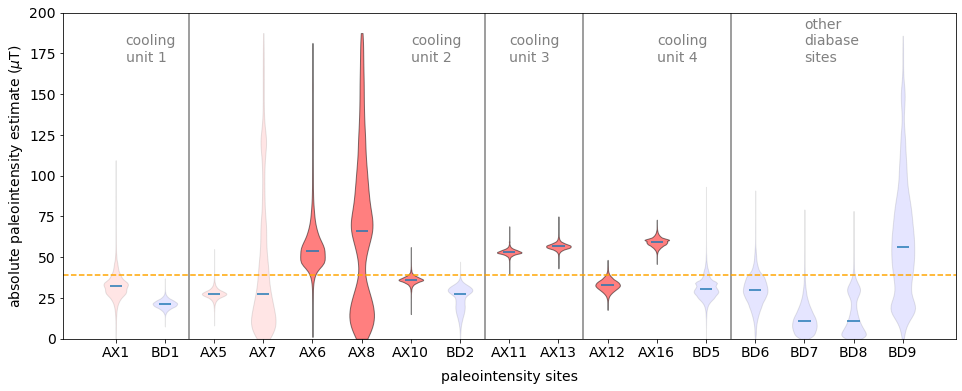

In [4]:
fig, ax = plt.subplots(figsize=(16,6))

parts = ax.violinplot(concat_frame.T, positions=range(concat_frame.shape[1]), showmedians=True,
        showextrema=False)

for i in range(concat_frame.shape[1]):
    this_site = cooling_unit_group[i]
    this_acept = accept[i]
    this_color = 'grey'
    this_alpha = 1
    
    if 'AX' in this_site:
        this_color = 'red'
    else:
        this_color = 'blue'
        
    
    if this_acept == 1:
        this_alpha = 0.5
    else:
        this_alpha = 0.1
    
    pc = parts['bodies'][i]
    pc.set_facecolor(this_color)
    pc.set_edgecolor('black')
    pc.set_alpha(this_alpha)
    
    if i < concat_frame.shape[1] and 'BD' in this_site and 'AX' in cooling_unit_group[i-1]:
        ax.axvline(i+0.5, color = 'grey', alpha = 1, ls='-')
        
    if 'AX13' in this_site:
        ax.axvline(i+0.5, color = 'grey', alpha = 1, ls='-')

plt.axhline(np.mean(concat_frame.mean(axis=1)), color='orange', ls='--',)

plt.text(0.2,170, 'cooling\nunit 1', color = 'grey', alpha = 1, fontsize=14)
plt.text(6,170, 'cooling\nunit 2', color = 'grey', alpha = 1, fontsize=14)
plt.text(8,170, 'cooling\nunit 3', color = 'grey', alpha = 1, fontsize=14)
plt.text(11,170, 'cooling\nunit 4', color = 'grey', alpha = 1, fontsize=14)
plt.text(14,170, 'other\ndiabase\nsites', color = 'grey', alpha = 1, fontsize=14)


plt.ylim(0, 200)
plt.xticks(ticks = range(len(cooling_unit_group)), labels = cooling_unit_group, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('absolute paleointensity estimate ($\mu$T)', fontsize=14)
plt.xlabel('paleointensity sites', fontsize=14, labelpad=10)

plt.savefig('code_output/PINT_BiCEP.pdf',bbox_inches='tight')
plt.show()

In [7]:
round(np.mean(concat_frame.mean(axis=1)),2)

38.82

In [8]:
round(np.std(concat_frame.mean(axis=1)),2)

4.6